In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk

/Users/howardqian/Library/Python/3.13/lib/python/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


# Light curve downloading and testing

In [2]:
search_result = lk.search_lightcurve("TOI 5872")

In [3]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 76,2024,SPOC,120,138671052,0.0
1,TESS Sector 82,2024,SPOC,120,138671052,0.0
2,TESS Sector 83,2024,SPOC,120,138671052,0.0
3,TESS Sector 15,2019,TESS-SPOC,1800,138671052,0.0
4,TESS Sector 16,2019,TESS-SPOC,1800,138671052,0.0
5,TESS Sector 76,2024,TESS-SPOC,200,138671052,0.0
6,TESS Sector 15,2019,QLP,1800,138671052,0.0
7,TESS Sector 16,2019,QLP,1800,138671052,0.0
8,TESS Sector 56,2022,QLP,200,138671052,0.0


In [4]:
lc = search_result[4].download()

In [5]:
lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1738.6806011498961,1.6777542e+03,2.3797514e+00,3.1120696e-03,24538,1198.91083,507.67745,1.3163990e+03,1.7675487e+00,1.0095222e+03,7.4855250e-01,1.6777542e+03,2.3797514e+00,0,———,———,———,———,1198.91083,8.9387991e-04,507.67745,8.1668270e-04,-2.8712768e-02,2.7121741e-02
1738.7014344179727,1.6807036e+03,2.3796713e+00,3.1120137e-03,24539,1198.91182,507.67865,1.3184357e+03,1.7674891e+00,1.0095585e+03,7.4874079e-01,1.6807036e+03,2.3796713e+00,0,———,———,———,———,1198.91182,8.9123222e-04,507.67865,8.1606768e-04,-2.8819228e-02,2.7769368e-02
1738.722267684186,1.6780371e+03,2.3797536e+00,3.1119559e-03,24540,1198.91208,507.67853,1.3163551e+03,1.7675502e+00,1.0101090e+03,7.4899375e-01,1.6780371e+03,2.3797536e+00,0,———,———,———,———,1198.91208,8.9279731e-04,507.67853,8.1742281e-04,-2.8257187e-02,2.6608890e-02
1738.7431009485367,1.6764854e+03,2.3792794e+00,3.1118963e-03,24541,1198.91334,507.67788,1.3150905e+03,1.7671980e+00,1.0099460e+03,7.4862504e-01,1.6764854e+03,2.3792794e+00,0,———,———,———,———,1198.91334,8.9338946e-04,507.67788,8.1762648e-04,-2.7806729e-02,2.7092775e-02
1738.7639342112575,1.6788467e+03,2.3807642e+00,3.1118351e-03,24542,1198.91224,507.67587,1.3166821e+03,1.7683008e+00,1.0098544e+03,7.4870843e-01,1.6788467e+03,2.3807642e+00,0,———,———,———,———,1198.91224,8.9302461e-04,507.67587,8.1773376e-04,-2.7549524e-02,2.6900653e-02
1738.784767472582,1.6810105e+03,2.3843608e+00,3.1117725e-03,24543,1198.91400,507.67851,1.3183506e+03,1.7709723e+00,1.0091648e+03,7.5408989e-01,1.6810105e+03,2.3843608e+00,0,———,———,———,———,1198.91400,8.9281856e-04,507.67851,8.1668823e-04,-2.7628744e-02,2.5732735e-02
1738.8056007320438,1.6784794e+03,2.3807263e+00,3.1117080e-03,24544,1198.91385,507.67656,1.3165132e+03,1.7682728e+00,1.0104441e+03,7.4996221e-01,1.6784794e+03,2.3807263e+00,0,———,———,———,———,1198.91385,8.9261559e-04,507.67656,8.1728533e-04,-2.6857050e-02,2.6595535e-02
1738.826433990108,1.6784263e+03,2.3801227e+00,3.1116421e-03,24545,1198.91299,507.67610,1.3157689e+03,1.7678242e+00,1.0097240e+03,7.5030917e-01,1.6784263e+03,2.3801227e+00,0,———,———,———,———,1198.91299,8.9337188e-04,507.67610,8.1746414e-04,-2.6585732e-02,2.5251262e-02


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized pdcsap_flux'>

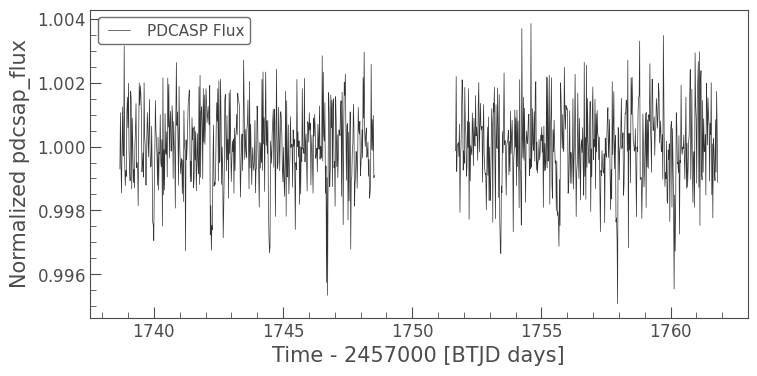

In [6]:
lc.plot(column='pdcsap_flux', label='PDCASP Flux', normalize=True)

In [7]:
ls_pg = lc.normalize(unit='ppm').to_periodogram(maximum_period=5)
ls_pg

LombScarglePeriodogram(ID: TIC 138671052)

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='Power [$\\mathrm{ppm}$]'>

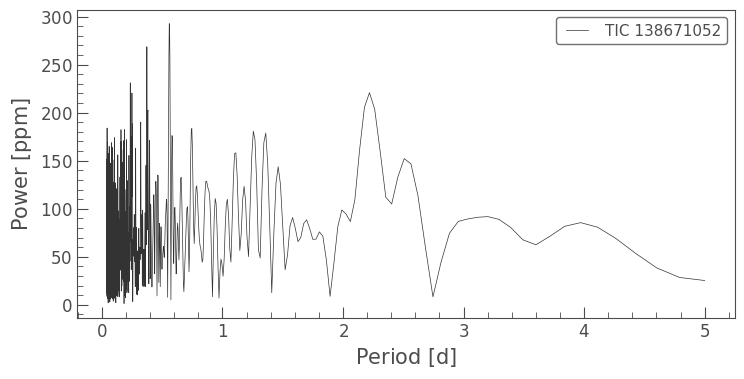

In [8]:
ls_pg.plot(view='period')

In [55]:
detrended_lc = lc.remove_outliers().flatten()

In [56]:
period = detrended_lc.to_periodogram('bls').period_at_max_power
print(period)

2.2416588621981144 d


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

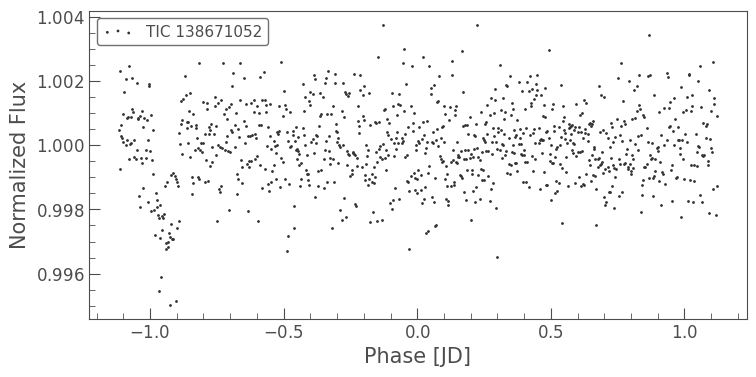

In [57]:
detrended_lc.fold(period).scatter()

# BLS and Lombscargle Periodograms

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

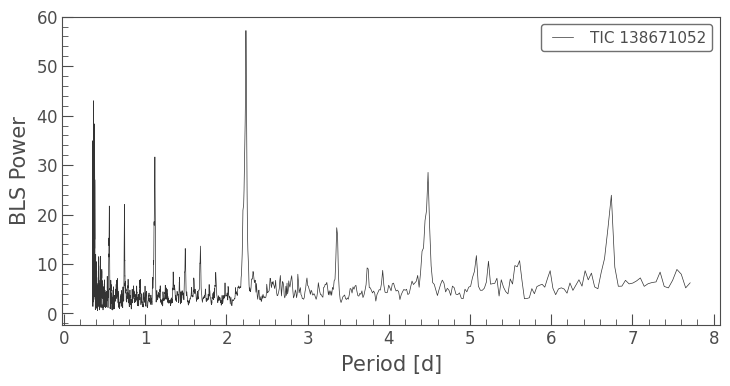

In [13]:
bls_pg = lc.normalize(unit='ppm').to_periodogram('bls')

bls_pg.plot()

0.5586780381162608 d


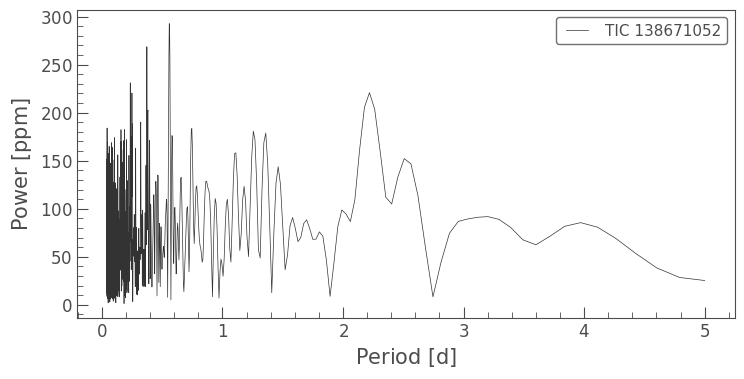

In [127]:
ls_pg = lc.normalize(unit='ppm').to_periodogram('lombscargle', maximum_period=5)
ls_pg.plot(view='period')

print(ls_pg.period_at_max_power)

# Folded and Binned LCs

2.2416588621981144 d
[1.00053278 1.00095563 1.000633   1.00005116 0.9999555  1.0004589
 0.99895987 0.99732024 0.99775126 0.9971201  0.99794537 0.99991794
 1.00102733 1.00001861 1.00021341 1.0002272  1.00012304 1.00037915
 0.99954576 1.00057904 0.99998015 1.00097739 1.00010629 1.00029659
 0.99981418 1.00049379 1.00018819 1.0005696  0.99970622 1.00014252
 1.00049291 0.99931669 0.99966998 0.99975959 1.00033399 0.99998246
 1.00051093 1.00019332 1.00039504 1.0000674  1.00065813 0.99980928
 1.00007924 1.0000268  0.99976499 1.00118953 0.99958515 0.99911148
 1.0000616  1.00022009 1.00004831 0.99973768 1.00047011 1.00080359
 0.9998462  0.99937508 0.99995623 0.99915971 1.00043042 0.99991822
 1.00015819 0.99937986 1.00020846 0.99971272 1.00006035 0.99974377
 0.99945701 0.99992405 1.00014355 0.99973898 0.99987317 1.0005956
 1.00041883 1.00040996 1.00021525 0.99999566 1.00042799 1.00051006
 1.00085585 1.00032108 0.99999395 0.99992601 0.99963167 1.00015073
 1.00031711 1.00013014 0.99992353 1.0002135

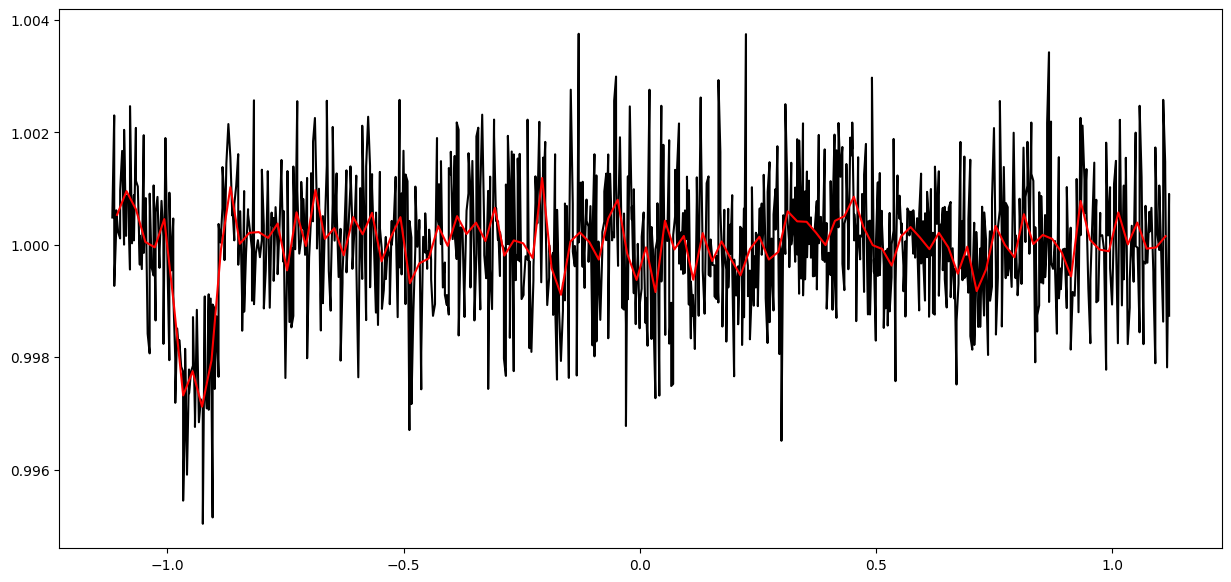

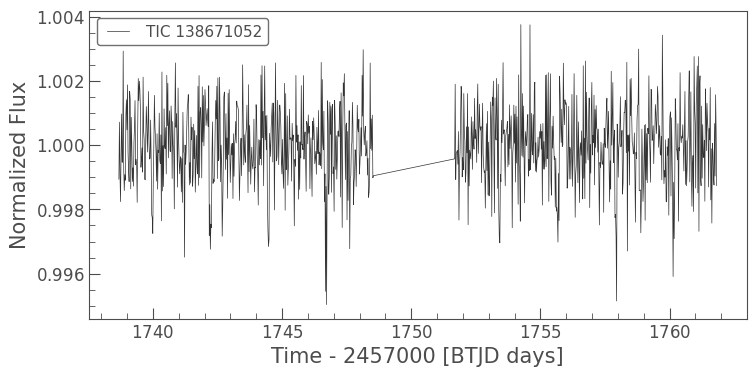

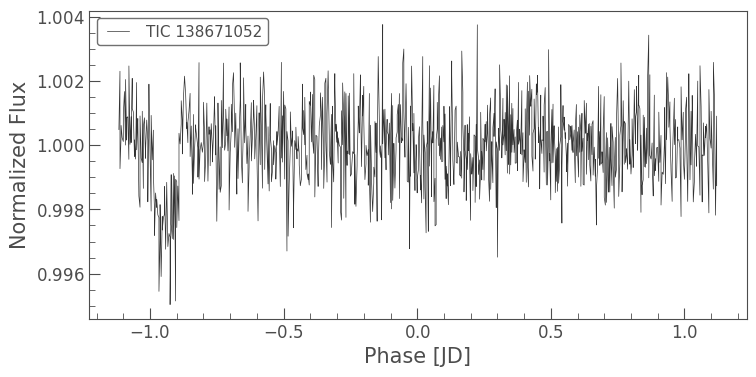

In [15]:
detrended_lc = lc.remove_outliers().flatten()

period = lc.to_periodogram('bls').period_at_max_power
print(period)

folded_lc = detrended_lc.fold(period)

binned_lc = folded_lc.bin(time_bin_size = 0.02)

plt.figure(figsize = (15, 7))
plt.plot(folded_lc.time.value, folded_lc.flux, '-k')
plt.plot(binned_lc.time.value, binned_lc.flux, '-r')

detrended_lc.plot()
folded_lc.plot()
print(binned_lc.flux)

# Using TLS instead of BLS and Lombscargle

In [19]:
from transitleastsquares import transitleastsquares
model = transitleastsquares(detrended_lc.time.value, detrended_lc.flux)
results = model.power()

Transit Least Squares TLS 1.32 (5 Apr 2024)
Creating model cache for 37 durations
Searching 958 data points, 2047 periods from 0.601 to 11.573 days
Using all 8 CPU threads


100%|█████████████████████████████████████████████████████████████████████████████████████| 2047/2047 periods | 00:01<00:00


Searching for best T0 for period 2.24175 days


In [40]:
help(transitleastsquares)

Help on class transitleastsquares in module transitleastsquares.main:

class transitleastsquares(builtins.object)
 |  transitleastsquares(t, y, dy=None, verbose=True)
 |
 |  Compute the transit least squares of limb-darkened transit models
 |
 |  Methods defined here:
 |
 |  __init__(self, t, y, dy=None, verbose=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  power(self, **kwargs)
 |      Compute the periodogram for a set of user-defined parameters
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object



In [36]:
print('Period', format(results.period, '.5f'), 'd')
print(len(results.transit_times), 'transit times in time series:', \
        ['{0:0.5f}'.format(i) for i in results.transit_times])
print('Transit depth', format(results.depth, '.5f'))
print('Best duration (days)', format(results.duration, '.5f'))
print('Signal detection efficiency (SDE):', results.SDE)
print('False Alarm Probability (fap):', results.FAP)

Period 2.24175 d
10 transit times in time series: ['1739.98536', '1742.22711', '1744.46887', '1746.71062', '1748.95237', '1751.19413', '1753.43588', '1755.67763', '1757.91938', '1760.16114']
Transit depth 0.99723
Best duration (days) 0.08129
Signal detection efficiency (SDE): 15.015568327314513
False Alarm Probability (fap): 8.0032e-05


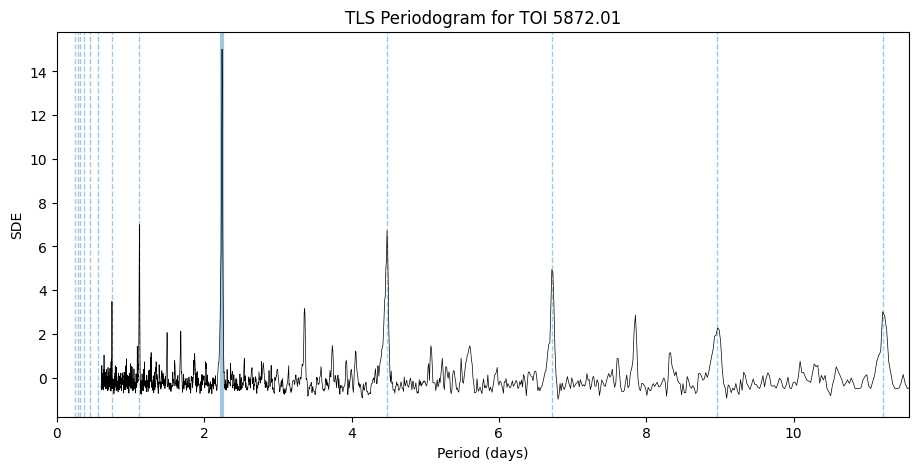

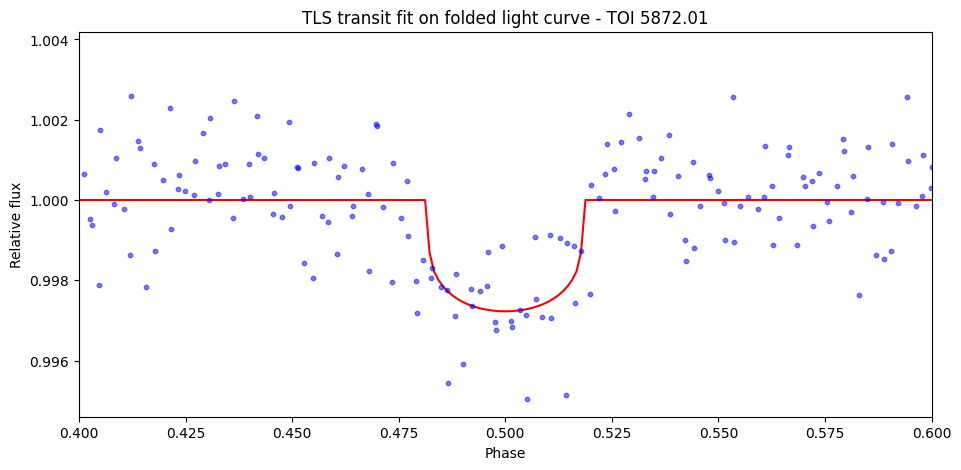

In [50]:
plt.figure(figsize = (11, 5))
plt.title('TLS Periodogram for TOI 5872.01')
ax = plt.gca()
ax.axvline(results.period, alpha=0.4, lw=3)
plt.xlim(np.min(results.periods), np.max(results.periods))
for n in range(2, 10):
    ax.axvline(n*results.period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results.period / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results.periods, results.power, color='black', lw=0.5)
plt.xlim(0, max(results.periods))

plt.figure(figsize = (11, 5))
plt.title('TLS transit fit on folded light curve - TOI 5872.01')
plt.plot(results.model_folded_phase, results.model_folded_model, color='red')
plt.scatter(results.folded_phase, results.folded_y, color='blue', s=10, alpha=0.5, zorder=2)
plt.xlim(0.4, 0.6)
plt.ticklabel_format(useOffset=False)
plt.xlabel('Phase')
plt.ylabel('Relative flux');

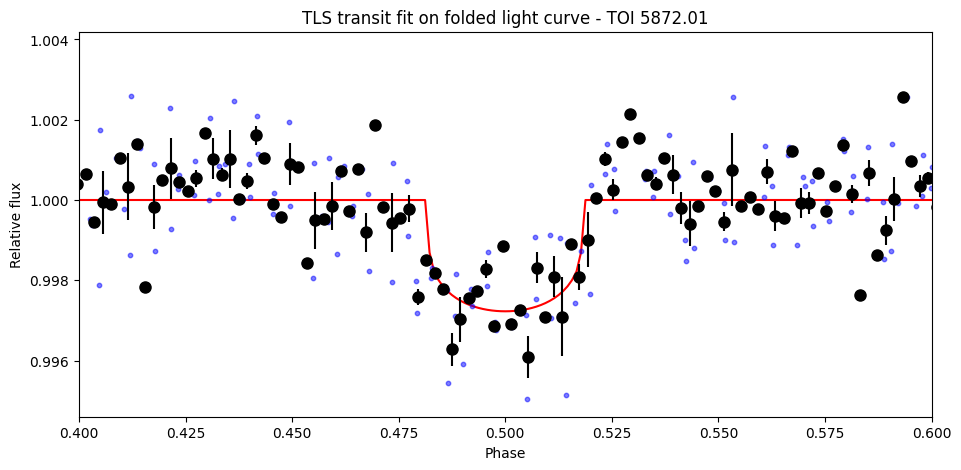

In [52]:
from scipy import stats
bins = 500
bin_means, bin_edges, binnumber = stats.binned_statistic(
    results.folded_phase,
    results.folded_y,
    statistic='mean',
    bins=bins)
bin_stds, _, _ = stats.binned_statistic(
    results.folded_phase,
    results.folded_y,
    statistic='std',
    bins=bins)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure(figsize = (11, 5))
plt.title('TLS transit fit on folded light curve - TOI 5872.01')
plt.plot(results.model_folded_phase, results.model_folded_model, color='red')
plt.scatter(results.folded_phase, results.folded_y, color='blue', s=10, alpha=0.5, zorder=2)
plt.errorbar(
    bin_centers,
    bin_means,
    yerr=bin_stds/2,
    xerr=bin_width/2,
    marker='o',
    markersize=8,
    color='black',
    #capsize=10,
    linestyle='none')
plt.xlim(0.4, 0.6)
plt.ticklabel_format(useOffset=False)
plt.xlabel('Phase')
plt.ylabel('Relative flux');

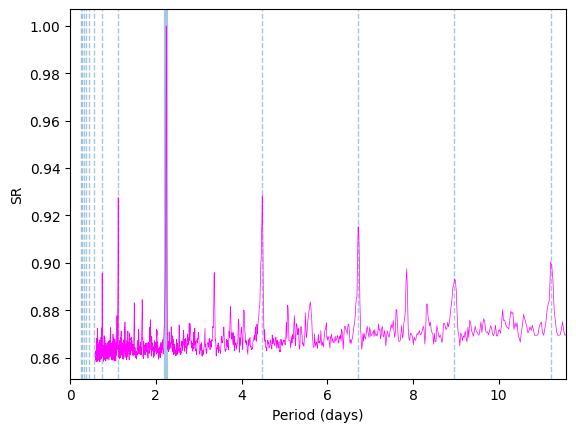

In [34]:
plt.figure()
ax = plt.gca()
ax.axvline(results.period, alpha=0.4, lw=3)
plt.xlim(np.min(results.periods), np.max(results.periods))
for n in range(2, 10):
    ax.axvline(n*results.period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results.period / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SR')
plt.xlabel('Period (days)')
plt.plot(results.periods, results.SR, color='magenta', lw=0.5)
plt.xlim(0, max(results.periods));

In [35]:
print(results.FAP)

8.0032e-05


# Vetting procedures

## Left-Right Transit Check

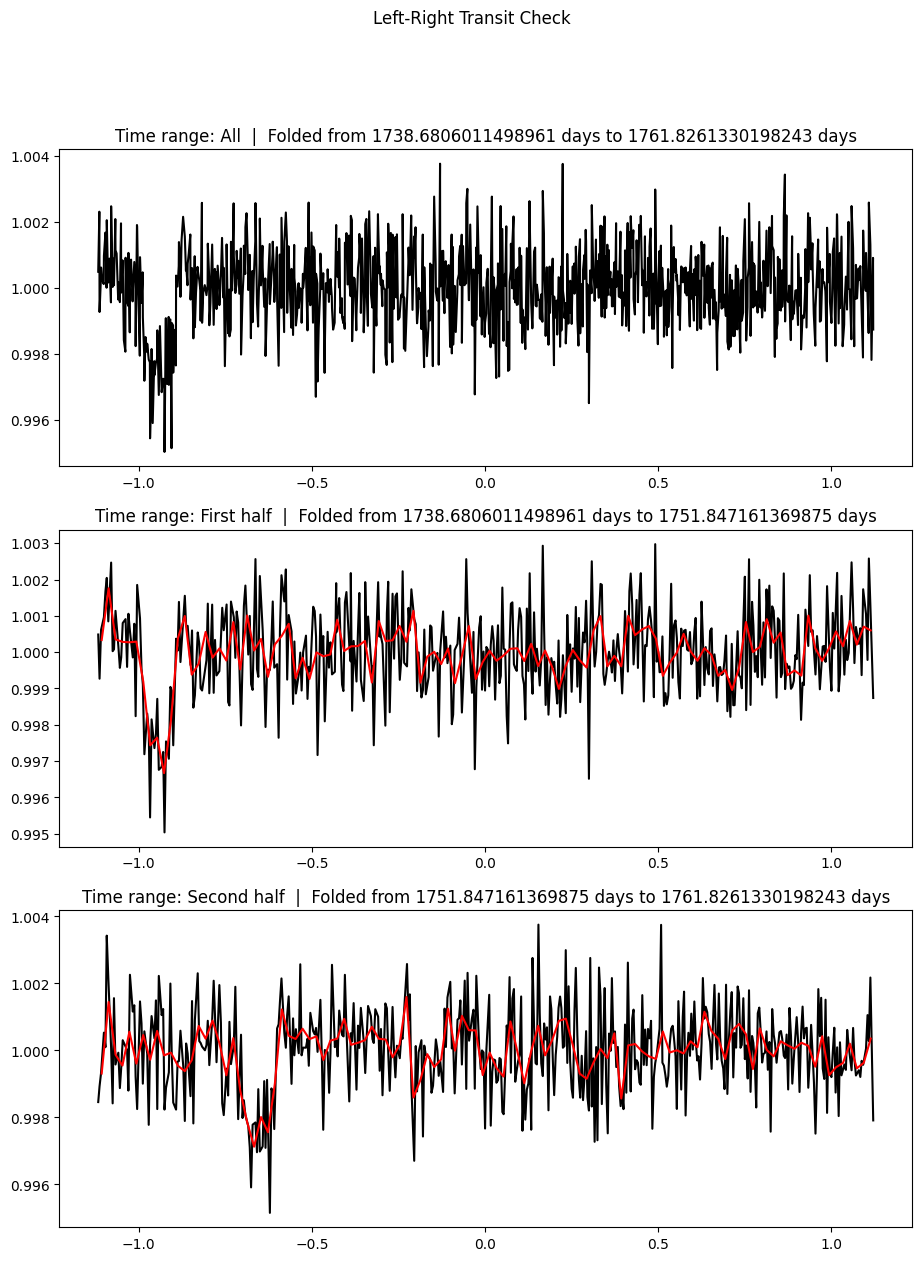

In [123]:
lc_length = len(detrended_lc)

fig, axs = plt.subplots(3, figsize=(11, 14))

fig.suptitle("Left-Right Transit Check")

axs[0].set_title(f"Time range: All  |  Folded from {detrended_lc['time'][0]} days to {detrended_lc['time'][lc_length - 1]} days")
folded_lc_total = detrended_lc.fold(results.period)
axs[0].plot(folded_lc_total.time.value, folded_lc_total.flux, '-k')

axs[1].set_title(f"Time range: First half  |  Folded from {detrended_lc['time'][0]} days to {detrended_lc['time'][lc_length // 2]} days")
folded_lc_1 = detrended_lc[0 : lc_length // 2].fold(results.period)
binned_lc_1 = folded_lc_1.bin(time_bin_size = 0.02)
axs[1].plot(folded_lc_1.time.value, folded_lc_1.flux, '-k')
axs[1].plot(binned_lc_1.time.value, binned_lc_1.flux, '-r')

axs[2].set_title(f"Time range: Second half  |  Folded from {detrended_lc['time'][lc_length // 2]} days to {detrended_lc['time'][lc_length - 1]} days")
folded_lc_2 = detrended_lc[lc_length // 2 : lc_length].fold(results.period)
binned_lc_2 = folded_lc_2.bin(time_bin_size = 0.02)
axs[2].plot(folded_lc_2.time.value, folded_lc_2.flux, '-k')
axs[2].plot(binned_lc_2.time.value, binned_lc_2.flux, '-r')

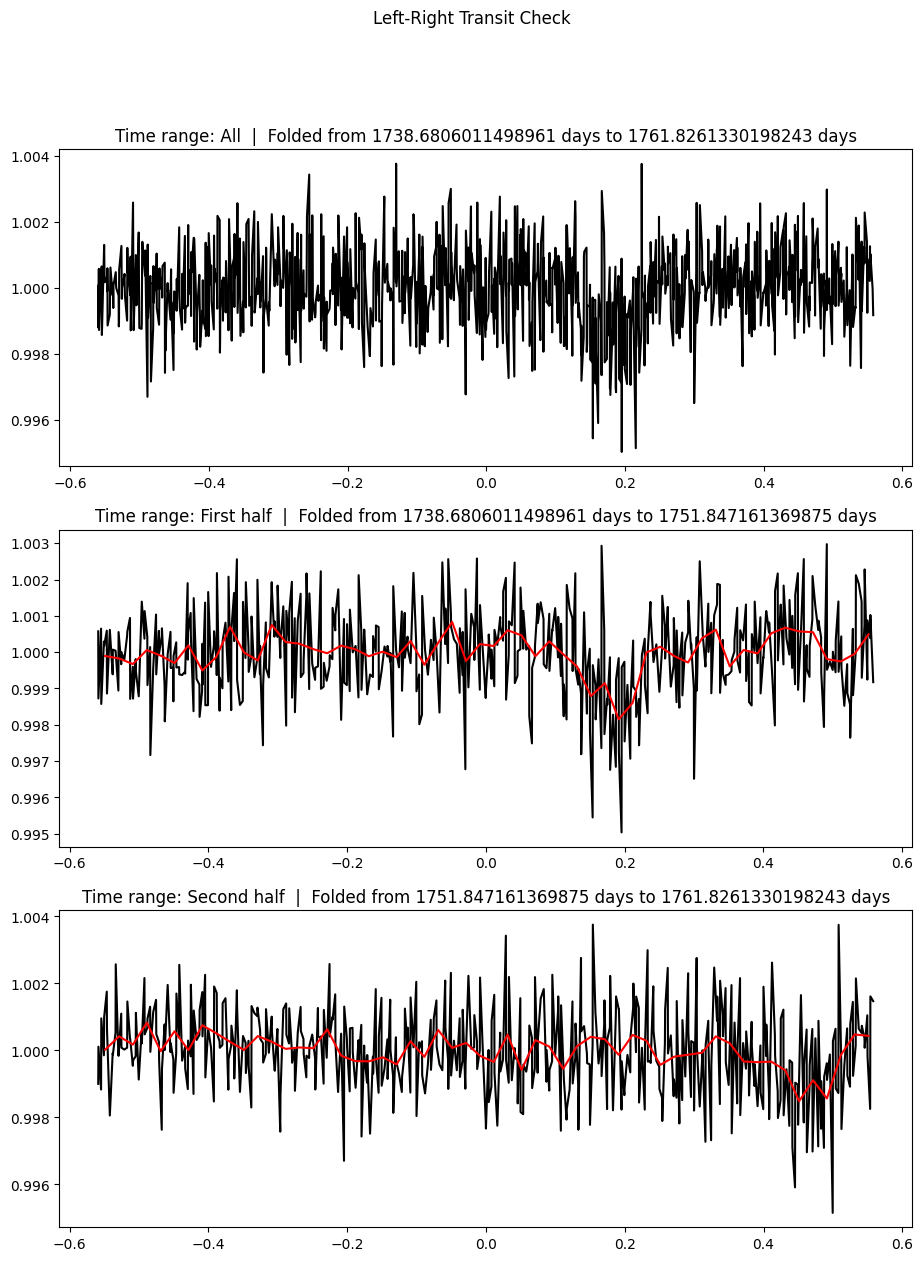

In [122]:
# Just checking if the transit is just a harmonic of period / 2 planet

lc_length = len(detrended_lc)

fig, axs = plt.subplots(3, figsize=(11, 14))

fig.suptitle("Left-Right Transit Check")

axs[0].set_title(f"Time range: All  |  Folded from {detrended_lc['time'][0]} days to {detrended_lc['time'][lc_length - 1]} days")
folded_lc_total = detrended_lc.fold(results.period / 2)
axs[0].plot(folded_lc_total.time.value, folded_lc_total.flux, '-k')

axs[1].set_title(f"Time range: First half  |  Folded from {detrended_lc['time'][0]} days to {detrended_lc['time'][lc_length // 2]} days")
folded_lc_1 = detrended_lc[0 : lc_length // 2].fold(results.period / 2)
binned_lc_1 = folded_lc_1.bin(time_bin_size = 0.02)
axs[1].plot(folded_lc_1.time.value, folded_lc_1.flux, '-k')
axs[1].plot(binned_lc_1.time.value, binned_lc_1.flux, '-r')

axs[2].set_title(f"Time range: Second half  |  Folded from {detrended_lc['time'][lc_length // 2]} days to {detrended_lc['time'][lc_length - 1]} days")
folded_lc_2 = detrended_lc[lc_length // 2 : lc_length].fold(results.period / 2)
binned_lc_2 = folded_lc_2.bin(time_bin_size = 0.02)
axs[2].plot(folded_lc_2.time.value, folded_lc_2.flux, '-k')
axs[2].plot(binned_lc_2.time.value, binned_lc_2.flux, '-r')

## Even-Odd Transit Check